In [4]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Transformations in 2D

- Refer to Chapter 2.4 A hierarchy of transformation in [Hartley's book: Multiple View Geometry in Computer Vision 2nd Edition](https://www.amazon.com/Multiple-View-Geometry-Computer-Vision/dp/0521540518)

- Homogeneous coordinate representation
- Euclidean Transformation: $R$, $t$
    - $H_E = R T$
    $$
        R = \begin{bmatrix}  \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}
        \quad
        T = \begin{bmatrix}  1 & 0 & t_x \\ 0 & 1 & t_x \\ 0 & 0 & 1 \end{bmatrix}
    $$

- Similarity Transformation: $s$, $R$, $t$
    $$
        S_s = \begin{bmatrix}  s & 0 & 0 \\ 0 & s & 0 \\ 0 & 0 & 1 \end{bmatrix}
    $$
- Affine Transformation: $A = \{ s, R, t, h\}$
    $$
        T_A =  R T S_s S_h
    $$

    - $h$: parameter for shear transformation 
    $$
        S_h = \begin{bmatrix}  1 & h & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
    $$
- Projective (Perspective) Transformation:
    $$
        H = R T S_s S_h P
    $$
    where
    $$
        P = \begin{bmatrix}  1 & 0 & 0 \\ 0 & 1 & 0 \\ v_1 & v_2 & 1 \end{bmatrix}
    $$

## Bilinear Interpolation

## Forward Transformation

## Backward Transformation

## Computation of the Transformation Matrix
When point correspondences are given instead of the transformation matrix, we need to find the transformation itself to perform the image mapping and interpolation.

1. One point correspondence determines the translation
2. Two point correspondences may determine: Euclidean, Similarity, or Euclidean+Shearing
3. Three point correspondences determine the affine transformaton
4. Four point correspondences determine the projective transformaiton

### Euclidean Transformation, Step-by-step Computation
- Given two point correspondences, find two canonical transformations that transfrom each of the point sets onto the $x$-axis.
- Apply inverse transformation to find the target transformation

### Affine Transformation and Texture Mapping

#### From a triangle to the canonical triangle:
- The canonical triangle: $\{ (0,0), (1,0), (0,1) \}$
- Given a triangle $\{ p_0, p_1, p_2 \}$
    1. $p_0$ goes to the the origin. This determines $\mathbf{H}_0$, and we transform the other two points.
    2. $p_1$ (which is obtained by $\mathbf{H}_0p_1$) goes to $x$-axis by rotation $\mathbf{H}_1 = \mathbf{R}(\theta)$ where 
        $$
            \theta = -\mathrm{atan2}(p_{1y}, p_{1x})
        $$
    3. $x_1$ goes to $1$ by scaling $s_x = 1/x_1$:
        $$
            \mathbf{H}_2 = \begin{bmatrix}  s_x & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
        $$
    4. Shearing: $(x_2, y_2)$ goes to $(0, y_2)$ by
        $$
            \mathbf{H}_3 = \begin{bmatrix}  1 & 0 & 0 \\ h & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
        $$
        where $h$ is obtained from the equation:
        $$
            x_2 h + y_2 = 0 \quad\Rightarrow\quad h = - \frac{y_2}{x_2}
        $$
    5. Finally, $y_2$ goes to $1$ by scaling:
        $$
            \mathbf{H}_4 = \begin{bmatrix}  1 & 0 & 0 \\ 0 & 1/y_2 & 0 \\ 0 & 0 & 1 \end{bmatrix}
        $$

    * Total Transformation:
        $$
            \mathbf{H} = \mathbf{H}_4 \cdots \mathbf{H}_0
        $$
        
- Compute the two series of transformations for $\{ p_0, p_1, p_2 \}$ and $\{ q_0, q_1, q_2 \}$, then $H: p \Rightarrow q$ is given by:
    $$
        \mathbf{H}_{p\Rightarrow q} = \mathbf{H}_q^{-1}  \mathbf{H}_p
    $$
    where the inverse of  is given by the multiplication of inverses in the reversed order:
    $$
        \mathbf{H} = \mathbf{H}^{-1}_0 \cdots \mathbf{H}_4^{-1}
    $$

**Q.** Prove the following for the inverse of Shearing transformation:
$$
    \begin{bmatrix}  1 & 0 & 0 \\ h & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}^{-1}
    =
    \begin{bmatrix}  1 & 0 & 0 \\ -h & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
$$

**Q.** Apply the steps to $\{ (3,4), (6,7), (3,9) \}$. Plot the triangle at each stage.

In [35]:
# vertices of the input triangle
p = np.array( [ [3,4,1], [6,7,1], [2,9,1] ])

print (p)

[[3 4 1]
 [6 7 1]
 [2 9 1]]


[[3 4 1]
 [6 7 1]
 [2 9 1]
 [3 4 1]]


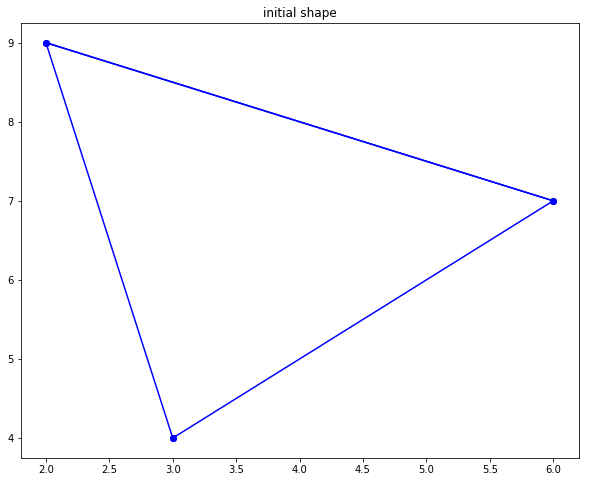

In [28]:
def drawTriangle(pnts, title=None):
    pnts = pnts.copy()
    pnts = np.vstack ( (pnts, pnts[0]) )
    print (pnts)
    plt.plot (pnts[:-1, 0], pnts[:-1,1], pnts[1:, 0], pnts[1:,1], marker='o', color='blue')
    if title is not None:
        plt.title(title)
    plt.show()
#

drawTriangle(p, 'initial shape')

### Homography Transformation and quadrangle/quadrilateral mapping

## PyTorch Implementation for Image Mapping

---
End.